# Breast Cancer Classification Model

## Problem Definition

The Breast Cancer is a universal major health issue which could be improved with early diagnosis which could potentially lead to a more effective treatment plan. 

The primary goal of this project is to develop a machine learning model that can accurately classify a breast tumor as either benign or malignant. This classification will be based on different features extracted from digitized images of a breast mass.

Reference:

*[1] Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. [UCI Machine Learning Repository](https://doi.org/10.24432/C5DW2B)*


## Dataset Exploration

### Wisconsin Diagnostic Breast Cancer Dataset

The Wisconsin Diagnostic Breast Cancer dataset describes the measurements on cells in suspicious lumps in a women's breast. This dataset, obtained from the University of Wisconsin Hospitals, includes 30 feature variables and 1 target variable. 

The features, or input attributes, are numeric, and a binary target variable: M for Malignant and B for benign.

Each cell-nucleus include 10 actual features:

- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry 
- Fractal dimension ("coastline approximation" - 1)

Now, the dataset will be loaded to check the data in detail. To accomplish this, the required libraries and packages will be installed.

A virtual environment will be instantiated and activated, which will help in isolating dependencies and avoiding conflicts:

`!python -m venv myenv `

`!.\myenv\Scripts\activate `

`!code .`



The Jupyter Notebook Kernel will need to be switched to the newly created environment using the Jupyter Notebook interface, and then all the required libraries will be installed.

In [1]:
!pip3 install ipykernel matplotlib pandas numpy seaborn scikit-learn tensorflow scikeras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip3 install -U ucimlrepo

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Diagnosis")

data_combined = pd.concat([X, y], axis=1)

A data preview will be retrieved to allow for an initial examination of the dataset.

In [4]:
# Print the first few rows of the data
print("\nFirst few rows of Features and Target combined")
print(data_combined.head())


First few rows of Features and Target combined
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst textur

### The dimensionality of the dataset

It can be observed that access to the repository from UCIML has been successfully established and the data has been loaded. 

Next, the dimensionality of the dataset needs to be understood in terms of the number of rows and columns (features and target variable).

In [5]:
# Print the shape of the data

print("Shape of X (features):", X.shape)
print("Shape of y (targets):", y.shape)

Shape of X (features): (569, 30)
Shape of y (targets): (569,)


### Statistical Summary

The statistical properties of each attribute will be retrieved to gain insights into the dataset.

In [6]:
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)

descriptionDataCombined = data_combined.describe()

print(descriptionDataCombined)

       mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  \
count      569.000       569.000         569.000    569.000          569.000           569.000   
mean        14.127        19.290          91.969    654.889            0.096             0.104   
std          3.524         4.301          24.299    351.914            0.014             0.053   
min          6.981         9.710          43.790    143.500            0.053             0.019   
25%         11.700        16.170          75.170    420.300            0.086             0.065   
50%         13.370        18.840          86.240    551.100            0.096             0.093   
75%         15.780        21.800         104.100    782.700            0.105             0.130   
max         28.110        39.280         188.500   2501.000            0.163             0.345   

       mean concavity  mean concave points  mean symmetry  mean fractal dimension  ...  \
count         569.000      

### Class Distribution

As this is a classification problem, the data will be analyzed to determine the number of observations for each class. If the classes are highly imbalanced, further actions will need to be taken during data pre-processing.

In [7]:
class_counts = data_combined['Diagnosis'].value_counts()
class_props  = data_combined['Diagnosis'].value_counts(normalize=True)

print("Class counts:")
print(class_counts)

print("\nClass proportions:")
print(class_props.round(2))


Class counts:
Diagnosis
1    357
0    212
Name: count, dtype: int64

Class proportions:
Diagnosis
1    0.63
0    0.37
Name: proportion, dtype: float64


### Features Correlation 

By calculating the correlation between the different variables, it will be possible to analyze if they are tightly coupled (highly correlated). This is important as it can affect the performance of the machine learning algorithms.

The Pearson's Correlation Coefficient will be calculated, assuming a normal distribution in the attributes.

In [8]:
# Calculate the Pearson's Correlation Coefficient
correlations = data_combined.corr(method='pearson')
print(correlations)

                         mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
mean radius                    1.000         0.324           0.998      0.987            0.171   
mean texture                   0.324         1.000           0.330      0.321           -0.023   
mean perimeter                 0.998         0.330           1.000      0.987            0.207   
mean area                      0.987         0.321           0.987      1.000            0.177   
mean smoothness                0.171        -0.023           0.207      0.177            1.000   
mean compactness               0.506         0.237           0.557      0.499            0.659   
mean concavity                 0.677         0.302           0.716      0.686            0.522   
mean concave points            0.823         0.293           0.851      0.823            0.554   
mean symmetry                  0.148         0.071           0.183      0.151            0.558   
mean fractal dimensi

Due to the large size of the table, variables that are highly correlated (greater than 0.75) will be retrieved by sorting and printing them.

In [9]:
# Unstack the correlation matrix
correlation_pairs = correlations.unstack()

# Sort the correlation pairs
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", ascending=False)

# Retrieve high correlations and exclude self-correlations, as they aren't relevant.
high_correlations = sorted_pairs[(sorted_pairs != 1.0) & (sorted_pairs.abs() > 0.75)]

print(high_correlations)

mean radius           mean perimeter          0.998
mean perimeter        mean radius             0.998
worst radius          worst perimeter         0.994
worst perimeter       worst radius            0.994
mean radius           mean area               0.987
                                              ...  
Diagnosis             mean concave points    -0.777
                      worst perimeter        -0.783
worst perimeter       Diagnosis              -0.783
worst concave points  Diagnosis              -0.794
Diagnosis             worst concave points   -0.794
Length: 114, dtype: float64


A correlation matrix will be plotted to achieve a better understanding of the data correlation.

References:

*[2] A. Ashfaq, "Plot correlation matrix using pandas," Stack Overflow, Apr. 8, 2015. [Online]. Available: [Stack Overflow](https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)*

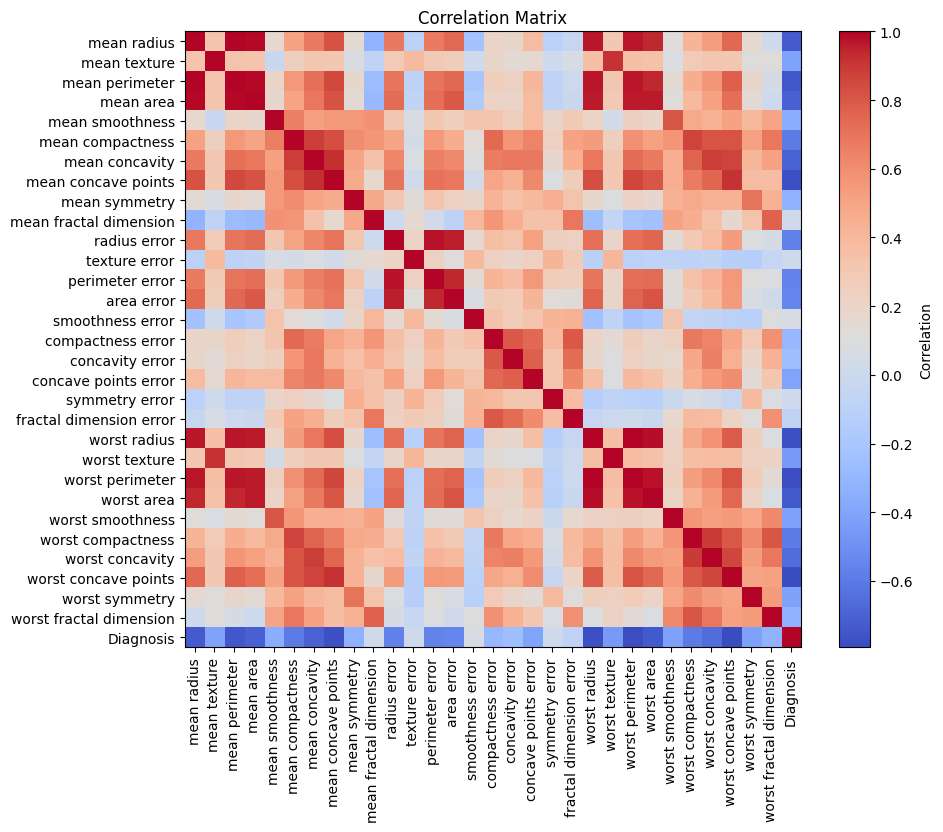

In [10]:
# Plotting the Correlation Matrix

plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.index)), correlations.index)
plt.show()

The correlation matrix shows a highly correlated variables are the radius and perimeter. This makes sense due to its mathematical relationship, as the radius is directly proportional to the perimeter.

### Skew of Univariate Distributions

Now, an analysis of the attributes will be carried out to identify if there is any attribute with a skew, in order to consider it during the data preparation phase.

In [11]:
skew = data_combined.skew()

sorted_skew = skew.sort_values(ascending=False)

negative_skew = sorted_skew[sorted_skew < 0]
positive_skew = sorted_skew[sorted_skew > 0]
higher_skew = sorted_skew[sorted_skew > 1]

print("\nNegative Skew\n")
print(negative_skew)

print("\nPositive Skew\n")
print(positive_skew)

print("\nHigher Skew\n")
print(higher_skew)


Negative Skew

Diagnosis   -0.528
dtype: float64

Positive Skew

area error                 5.447
concavity error            5.110
fractal dimension error    3.924
perimeter error            3.444
radius error               3.089
smoothness error           2.314
symmetry error             2.195
compactness error          1.902
worst area                 1.859
worst fractal dimension    1.663
texture error              1.646
mean area                  1.646
worst compactness          1.474
concave points error       1.445
worst symmetry             1.434
mean concavity             1.401
mean fractal dimension     1.304
mean compactness           1.190
mean concave points        1.171
worst concavity            1.150
worst perimeter            1.128
worst radius               1.103
mean perimeter             0.991
mean radius                0.942
mean symmetry              0.726
mean texture               0.650
worst texture              0.498
worst concave points       0.493
mean smoot

The skew results show there is no negative skew as all attribute values are positive. Additionally, it can be observed that some features have a higher skew than the rest of the features, with values greater than 3. 

Histograms of each attribute will now be plotted to check their distribution.

*[3] W3Schools. Pandas DataFrame skew() Method. Retrieved from [W3Schools](https://www.w3schools.com/python/pandas/ref_df_skew.asp)*

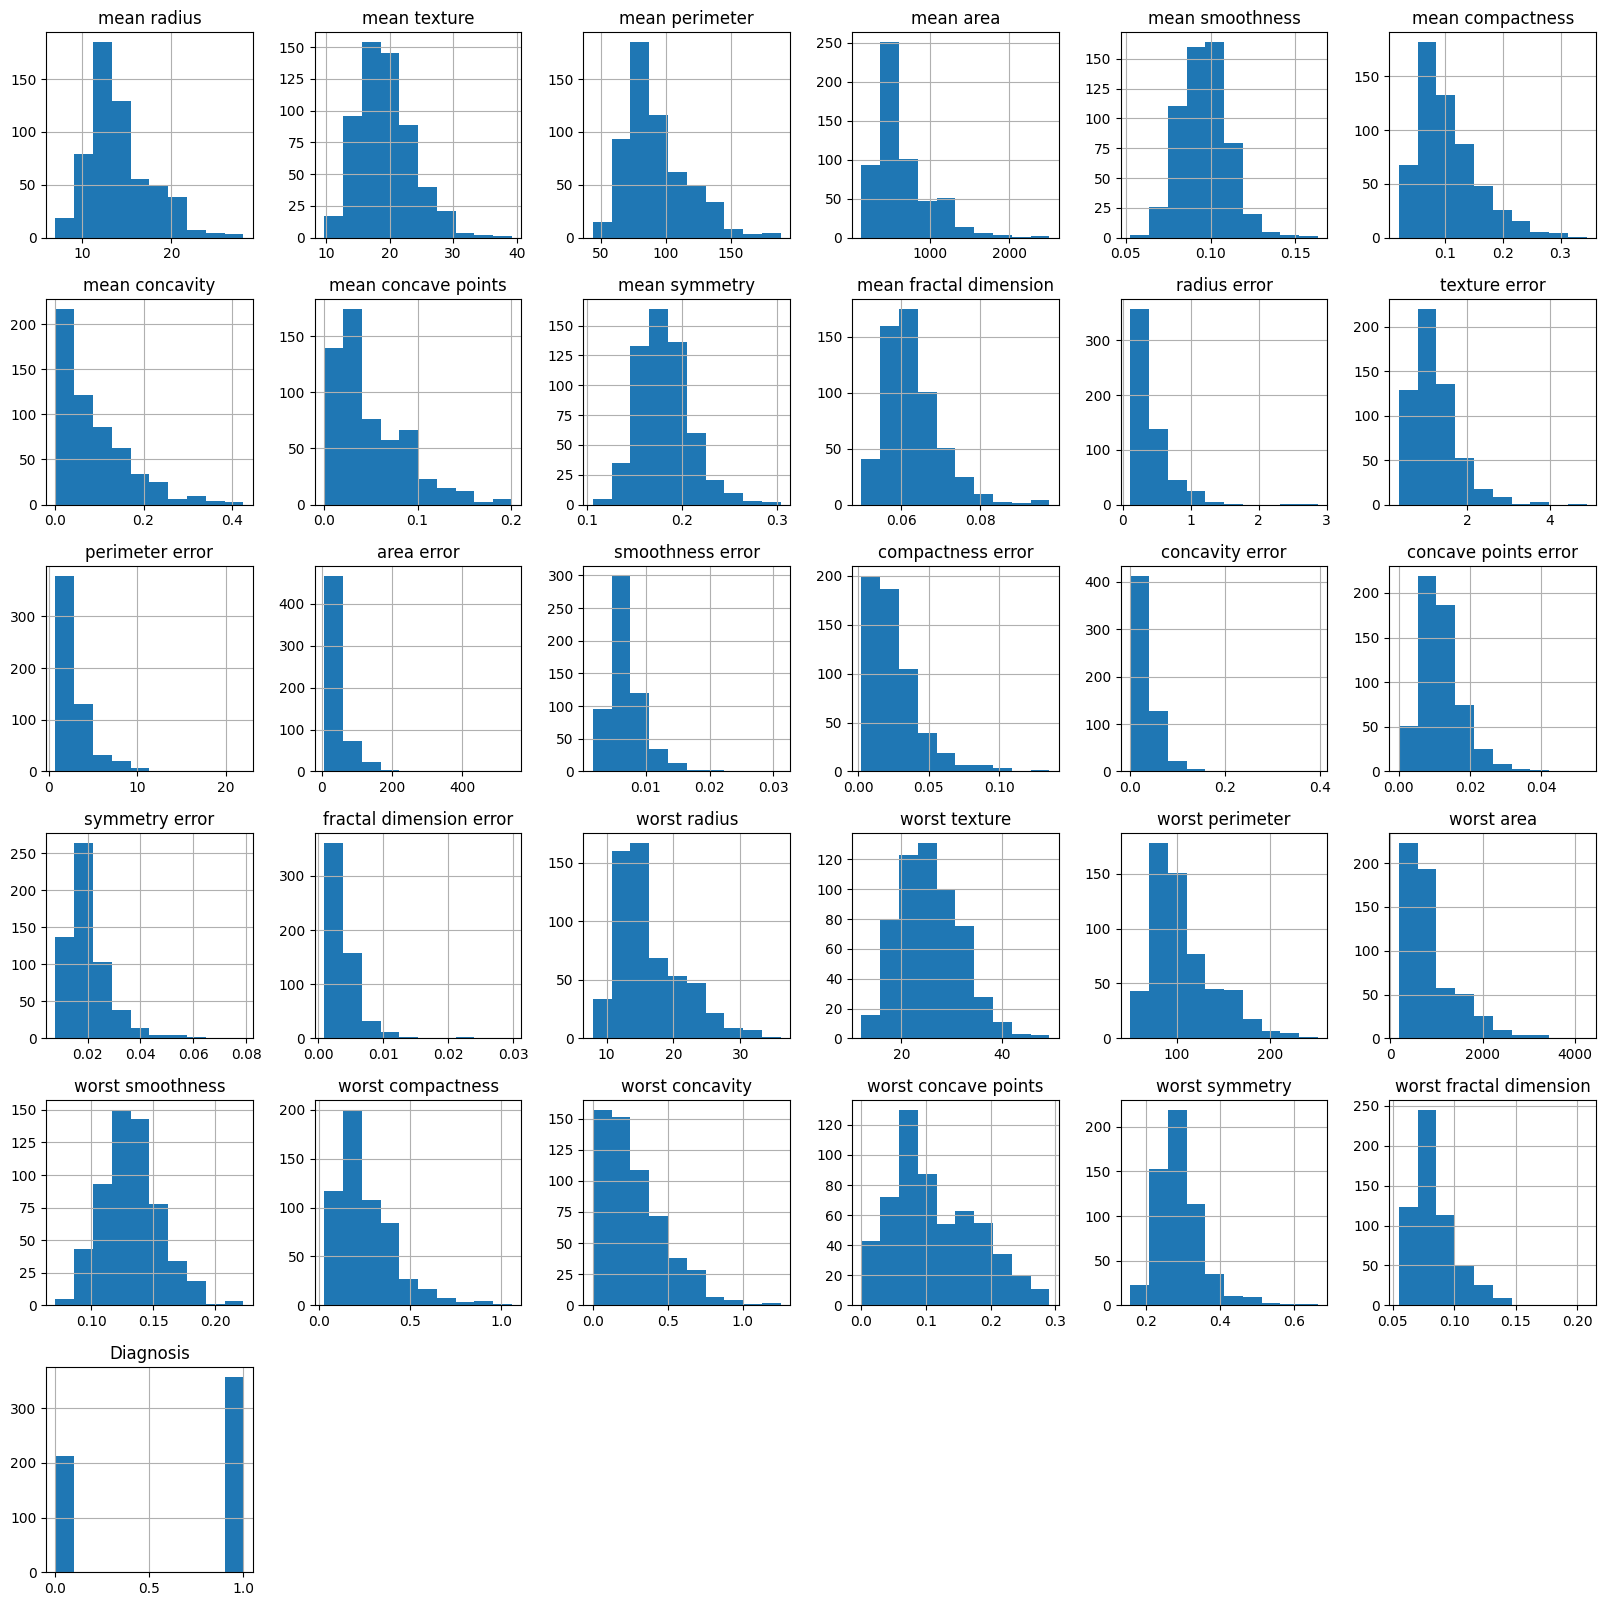

In [12]:
# Univariate Histograms
data_combined.hist(figsize=[20, 20])
plt.show()

## Data Transformation

As it is described in the dataset information, there are no missing values in features and the target so no major transformations are deemed necessary for the data, except for transforming the target column to a numeric format, as some models require a numeric target variable.

In terms of data scaling, the data will be standardized. Models such as Logistic Regression, SVM, k-Nearest Neighbors, and Neural Networks utilize optimization algorithms that perform better when the data is standardized.

Additionally, a feature selection technique will be implemented in the next steps, which also requires standardization to ensure that all features are treated equally.

*[4] Scikit-learn developers. LabelEncoder — scikit-learn 1.5.0 documentation. Retrieved from [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preproc)*

*[5] Scikit-learn developers. StandardScaler — scikit-learn 1.5.0 documentation. Retrieved from [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)*

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Target variable transformation - from string to numeric
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y.squeeze())

# Print the transformed target variable to check
print("Transformed Target Variables (First 10 elements):", y_numeric[:10])

# Split data FIRST, then scale
# This prevents data leakage - the scaler will only see training data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.3, random_state=42
)

# Fit scaler on training data ONLY, then transform both sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)   # fit + transform on train
X_test_scaled = scaler.transform(X_test_raw)          # transform ONLY on test

print(f"Training set size: {X_train_scaled.shape[0]}")
print(f"Test set size: {X_test_scaled.shape[0]}")

Transformed Target Variables (First 10 elements): [0 0 0 0 0 0 0 0 0 0]
Training set size: 398
Test set size: 171


## Feature Engineering

### Feature Selection

As the data set includes several features related to the same mass area, a feature importance will be applied to understand which specific features are most important for prediction in improve the model interpreatibiltiy by simplifying it.

Feature importance will be applied using the Random Forest Classifier, trained ONLY on the training data to avoid data leakage.

                    Feature  Importance
7       mean concave points       0.142
27     worst concave points       0.127
23               worst area       0.118
6            mean concavity       0.081
20             worst radius       0.078
22          worst perimeter       0.074
2            mean perimeter       0.060
3                 mean area       0.054
26          worst concavity       0.041
0               mean radius       0.032
13               area error       0.030
21            worst texture       0.019
25        worst compactness       0.018
10             radius error       0.016
28           worst symmetry       0.013
12          perimeter error       0.012
24         worst smoothness       0.012
1              mean texture       0.011
5          mean compactness       0.009
19  fractal dimension error       0.007
29  worst fractal dimension       0.007
4           mean smoothness       0.006
14         smoothness error       0.006
16          concavity error       0.006


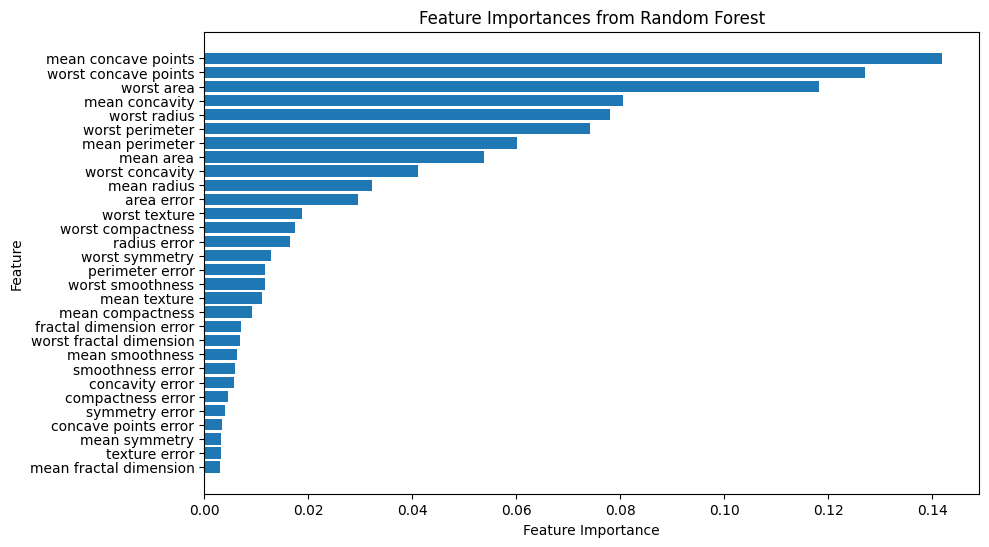

Selected Important Features:
7      mean concave points
27    worst concave points
23              worst area
6           mean concavity
20            worst radius
22         worst perimeter
2           mean perimeter
3                mean area
26         worst concavity
0              mean radius
13              area error
21           worst texture
25       worst compactness
10            radius error
28          worst symmetry
12         perimeter error
24        worst smoothness
1             mean texture
Name: Feature, dtype: object

Training features shape after selection: (398, 18)
Test features shape after selection: (171, 18)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest on TRAINING data only
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Select top features (those with importance > 0.01)
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
top_features_indices = [list(feature_names).index(f) for f in top_features]

X_train_top = X_train_scaled[:, top_features_indices]
X_test_top = X_test_scaled[:, top_features_indices]

print("Selected Important Features:")
print(top_features)
print(f"\nTraining features shape after selection: {X_train_top.shape}")
print(f"Test features shape after selection: {X_test_top.shape}")

The feature importance plot shows that the most important features are related to the shape and size of the mass, such as area, concavity and permiter.

Some measurements suggests that there is some redundancy in the the features dataset.

Other features such as texture, compactness or smoothness provide less information for the classification problem.

### Dimensionality Reduction

#### Principal Component Analysis (PCA)

As a preprocessing step, and in order to exclude irrelevant or redundant features, dimensionality reduction will be carried out using the Principal Component Analysis (PCA) technique and Train Test Split. This will allow the capture of the maximum variance in the dataset with a fewer number of components.

The feature importance will be also considered in this step.

PCA is fit ONLY on the training data to avoid data leakage.

Reference:

*[6] "Principal Component Analysis with Python," GeeksforGeeks, 2024. [Online]. Available: [GeekforGeeks](https://www.geeksforgeeks.org/principal-component-analysis-with-python/)*

In [15]:
from sklearn.decomposition import PCA

# Fit PCA on TRAINING data only, then transform both sets
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_top)   # fit + transform on train
X_test_pca = pca.transform(X_test_top)          # transform ONLY on test

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

# Print the explained variance ratio of each principal component
print("\nExplained variance ratio of each principal component:")
for i, variance_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {variance_ratio:.4f}")

total_explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"\nTotal explained variance: {total_explained_variance:.4f}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")


Shape of X_train_pca: (398, 5)
Shape of X_test_pca: (171, 5)

Explained variance ratio of each principal component:
Principal Component 1: 0.6063
Principal Component 2: 0.1529
Principal Component 3: 0.0884
Principal Component 4: 0.0573
Principal Component 5: 0.0314

Total explained variance: 0.9363
Total explained variance: 0.9363


It can be observed that Principal Components 1 have significantly higher variance ratios compared to the rest, making them more important in capturing the variance of the dataset.

The Logistic Regression model accuracy will be estimated using only the first 5 principal components and Train Test Split.

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train_pca, y_train)

accuracy_train = model.score(X_train_pca, y_train)
accuracy_test = model.score(X_test_pca, y_test)
print(f"Logistic Regression Training Accuracy with 5 PCs: {accuracy_train:.4f}")
print(f"Logistic Regression Test Accuracy with 5 PCs: {accuracy_test:.4f}")

Logistic Regression Training Accuracy with 5 PCs: 0.9749
Logistic Regression Test Accuracy with 5 PCs: 0.9825


The model's performance remains high with an accuracy of approximately 0.98 using only the first 5 principal components. This indicates that the additional principal components are not necessary for solving the classification task effectively.

## Model Estimation

Since the transformed dataset with the selected components is already stored in the variable X_PCA, the resampling method K-Fold Cross-Validation will be performed to evaluate how well the different models perform with data that haven't been used to train them.

### Model Performance Estimation

The goal is to compare and select the best model based on its performance estimation across multiple folds.

The performance of the different machine learning algorithms will be estimated using K-Fold Cross-Validation:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine
- k-Nearest Neighbors
- Neural Network

All of them are *Supervised Learning Models* since the data is labeled. Supervised learning is appropriate for classification tasks, which is the focus of this project. The aim is to train the models to accurately classify new data by learning patterns from the labeled training data.

The models will learn based on the input features and the output label (benign or malignant). This training process will eventually enable the models to make accurate predictions on unseen data.

Use pipelines for all model evaluation. This ensures that for each cross-validation fold, the scaler and PCA are fit only on the training fold
and then applied to the validation fold. This completely eliminates data leakage.

Although all models perform very well on the dataset, Logistic Regression and SVM models have demonstrated the best scores.

Now, the performance of a Neural Network will be analyzed on the same dataset and with the same seed.
The model will include several Dense layers which will use two different activation functions:
- ReLU
- Sigmoid

*ReLU* will output the input directly if posistive, while *Sigmoid* squashes the input to a range between 0 and 1.

The selected loss function is *Binary Cross-Entropy* as it is suitable for a Binary classification problem. It will quantify the error between the predicted and actual values.

Reference:

*[7] "Keras Layers," Keras Documentation, 2024. [Online]. Available: [Keras Layers](https://keras.io/2.15/api/layers/)*

*[8] Sharma, N. (2019, October 16). Towards Data Science. Retrieved from [Towards Data Science](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)*


In order to prevent overfitting, a dropout layer has been added. This layer will randomly set some of the neurons to zero during the training phase, with a 50% chance for each neuron to be dropped, to achieve generalization in the model.

Additionally, L2 regularization has been added to the dense layers to keep the weights small and reduce model complexity and overfitting.

After implementing additional layers, dropout, and L2 regularization, the accuracy of the neural network model has improved. The accuracy of the neural network model is now comparable to the other models.

The neural network model achieved an accuracy of approximately 0.98, which is similar to the accuracy achieved by the other models. This indicates that the neural network model is performing well on the breast cancer dataset.

Some overfitting is observed in the last model, as it performs better than the previous two models. This conclusion is based on independent testing, which shows a slight reduction in performance. However, further investigation is not pursued as it can be attributed to random variations due to how the cross-validation splits the data.


References:

*[9] R. Vij, "Combating Overfitting with Dropout Regularization," Towards Data Science, 27-Apr-2020. [Online]. Available: [Towards Data Science](https://towardsdatascience.com/combating-overfitting-with-dropout-regularization-f721e8712fbe.)*

*[10] J. Brownlee, "How to Reduce Overfitting in Deep Learning with Weight Regularization," Machine Learning Mastery, 25-Aug-2020. [Online]. Available: [Machine Learning Mastery](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/.)*

Data leakage occurs when information from outside the training dataset is used to create the model. In order to avoid data leakages a pipeline is used to standardize the data and apply PCA before training the model. This pipelining has been used in previous steps as well.

The pipeline is then evaluated using k-Fold Cross-Validation. For each fold, the data pipeline (including Standarization and PCA) is fitted on the training data. Once this is done, fitted transformations are applied to the test data within the same fold.

The model training is then done on the transformed training data and the model evaluation on the transformed test data.

The goal is to ensure that the test data is never seen during the training and it is only used during the model evaluation.

Reference:

*[7] "Leakage (machine learning)," Wikipedia, 13-May-2024. [Online]. Available: [Wikipedia](https://en.wikipedia.org/wiki/Leakage_(machine_learning).)*

Logistic Regression: 0.967372 (0.015950)
Decision Tree Classifier: 0.922244 (0.069227)
Random Forest Classifier: 0.949808 (0.038858)
Support Vector Machine: 0.969872 (0.021915)
k-Nearest Neighbors: 0.957372 (0.022546)
Neural Network 1: 0.949679 (0.025200)
Neural Network 2: 0.964808 (0.016665)
Neural Network 3: 0.964872 (0.025573)


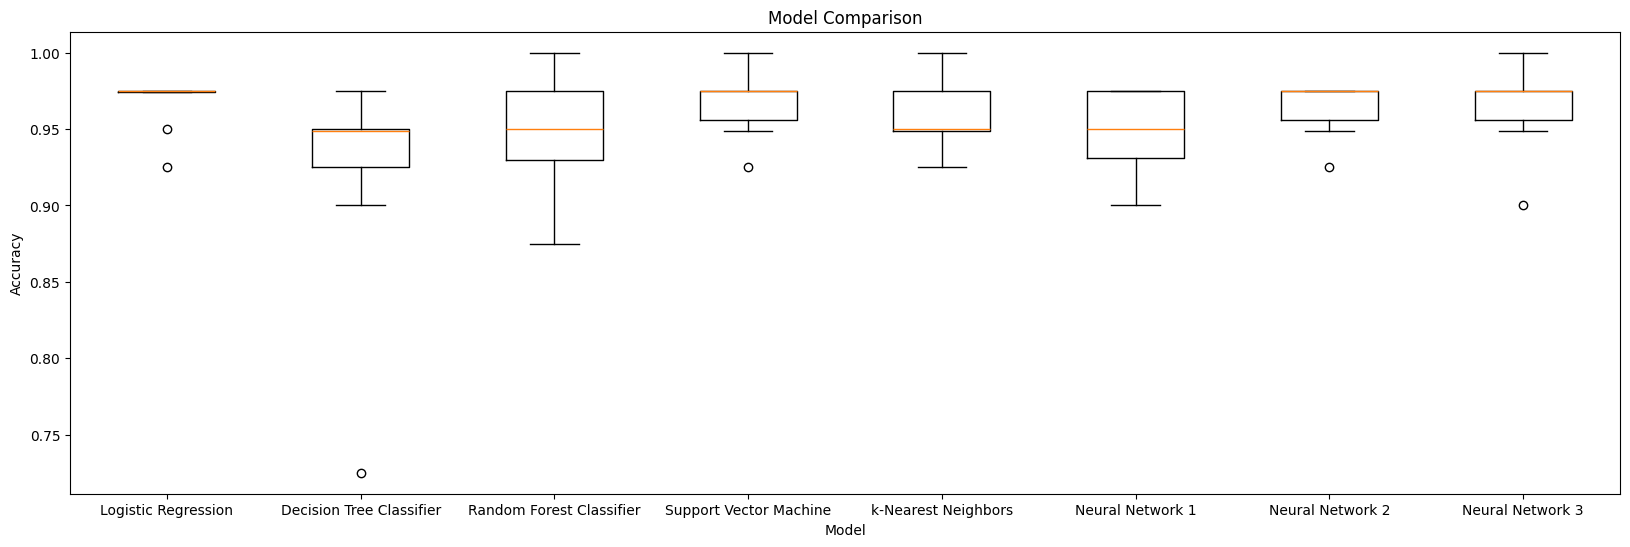


Model Performance:
                      Model  Mean Accuracy  Standard Deviation
0       Logistic Regression          0.967               0.016
1  Decision Tree Classifier          0.922               0.069
2  Random Forest Classifier          0.950               0.039
3    Support Vector Machine          0.970               0.022
4       k-Nearest Neighbors          0.957               0.023
5          Neural Network 1          0.950               0.025
6          Neural Network 2          0.965               0.017
7          Neural Network 3          0.965               0.026


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel  # <-- NEW IMPORT
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import warnings

# Suppress all UserWarnings to improve readability
warnings.filterwarnings('ignore', category=UserWarning)

# --- Neural network model factories ---
# REMOVED hardcoded input_dim so Keras infers the input shape automatically.
# This is necessary because SelectFromModel may select a different number of
# features in each CV fold, and PCA further reduces dimensionality.

# Accept meta_input_shape so scikeras can pass the shape at build time.

def create_model_1(meta_input_shape=(5,)):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=meta_input_shape))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_model_2(meta_input_shape=(5,)):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=meta_input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_model_3(meta_input_shape=(5,)):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=meta_input_shape,
                    kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# --- Cross-validation setup ---
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# --- Define the feature selector (reused across all pipelines) ---
# SelectFromModel fits a RandomForest on the TRAINING fold, computes
# feature importances, and keeps only features above the threshold.
# This happens independently in each CV fold — no leakage.
feature_selector = SelectFromModel(
    RandomForestClassifier(random_state=42),
    threshold=0.01  # Same threshold you used before
)

# --- Build pipelines ---
# Pipeline order: Scale → Select Features → PCA → Classify
#
# For each CV fold:
#   1. StandardScaler:    fit on train fold, transform train + val
#   2. SelectFromModel:   fit RF on train fold, select features for train + val
#   3. PCA:               fit on train fold, transform train + val
#   4. Classifier:        fit on train fold, predict on val

models = []
models.append(('Logistic Regression', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression(solver='liblinear'))
])))
models.append(('Decision Tree Classifier', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', DecisionTreeClassifier())
])))
models.append(('Random Forest Classifier', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier())
])))
models.append(('Support Vector Machine', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', SVC())
])))
models.append(('k-Nearest Neighbors', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', KNeighborsClassifier())
])))
models.append(('Neural Network 1', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', KerasClassifier(model=create_model_1, epochs=150, batch_size=10, verbose=0))
])))
models.append(('Neural Network 2', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', KerasClassifier(model=create_model_2, epochs=150, batch_size=10, verbose=0))
])))
models.append(('Neural Network 3', Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold=0.01)),
    ('pca', PCA(n_components=5)),
    ('classifier', KerasClassifier(model=create_model_3, epochs=150, batch_size=10, verbose=0))
])))

# --- Evaluate each model ---
# IMPORTANT: Pass X_train_raw (unscaled, all 30 features).
# The pipeline handles everything internally per fold.
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = cross_val_score(model, X_train_raw, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Plot the results
plt.figure(figsize=(20, 6))
plt.boxplot(results, tick_labels=names)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': names,
    'Mean Accuracy': [result.mean() for result in results],
    'Standard Deviation': [result.std() for result in results]
})

print("\nModel Performance:")
print(results_df)

When using the first five PCA components, machine learning models tend to have the same or improved performance. This improvement is not observed when all ten PCA components are used, making the additional components unnecessary for enhancing model performance. Although this finding is somewhat expected, it highlights the effectiveness of dimensionality reduction in optimizing models.

SVM, Logistic Regression and Neural Networks are effective for breast cancer classification with this dataset.

# Final Model Evaluation On Held-Out Test Set

This is the true evaluation - using data the model has never seen.
We pick the best model from cross-validation and evaluate it on X_test.


=== Final Evaluation on Held-Out Test Set ===

Test Accuracy: 0.9708

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        63
   Malignant       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



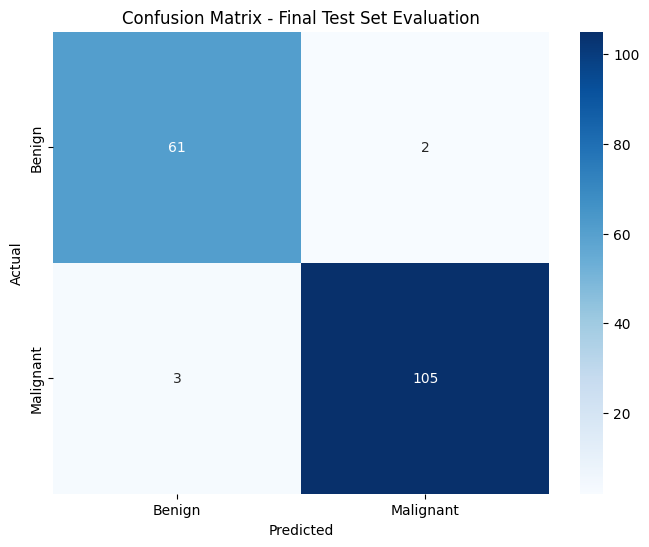

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Choose the best pipeline from CV results (e.g., Logistic Regression)
# You can change this based on your CV results
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('model', SVC())
    #('model', LogisticRegression(solver='liblinear'))
])

# Fit on the ENTIRE training set (scaler, PCA, and model all fit here)
best_pipeline.fit(X_train_raw, y_train)

# Predict on the HELD-OUT test set (never seen during training or CV)
y_pred = best_pipeline.predict(X_test_raw)

# Final evaluation metrics
print("\n=== Final Evaluation on Held-Out Test Set ===\n")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Final Test Set Evaluation')
plt.show()